# Image segmentation task.

Korobov K.S. 3/18/2023

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import skimage
from skimage import io, color, filters, feature, measure
import pyclesperanto_prototype as cle
from scipy import ndimage as ndi
import napari

In [2]:
import glob
path_to_images = "./images/"
images = np.array([cv2.imread(file) for file in glob.glob(path_to_images + "*.tif")])

# Convert to grayscale
images = np.array([cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) for image in images])

In [3]:
def plot_img(images, titles, cmap_name="gray"):
    fig, ax = plt.subplots(1, 3, figsize=(10, 6))
    ax[0].set_title(titles[0])
    ax[0].imshow(images[0], cmap=cmap_name)
    ax[1].set_title(titles[1])
    ax[1].imshow(images[1], cmap=cmap_name)
    ax[2].set_title(titles[2])
    ax[2].imshow(images[2], cmap=cmap_name)

def plot_one_img(image, title, cmap_name="gray"):
    plt.figure(figsize=(10, 6))
    plt.title(title)
    plt.imshow(image, cmap=cmap_name)

def plot_one2one(imageOne, imageTwo, titleOne, titleTwo, cmap_name="gray"):
    fig, ax = plt.subplots(1, 2, figsize=(10, 6))
    # Turn off tick labels
    ax[0].set_title(titleOne)
    ax[0].imshow(imageOne, cmap=cmap_name)
    ax[1].set_title(titleTwo)
    ax[1].imshow(imageTwo, cmap=cmap_name)
    plt.tight_layout()

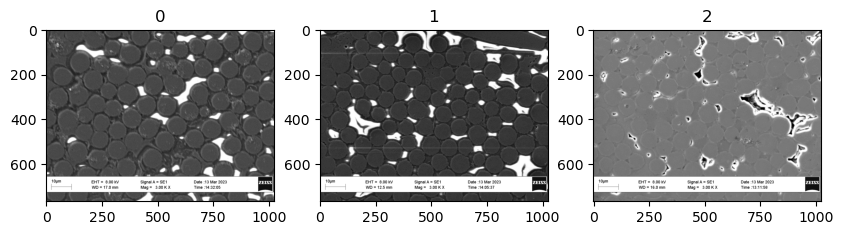

In [4]:
plot_img(images, [0, 1, 2])

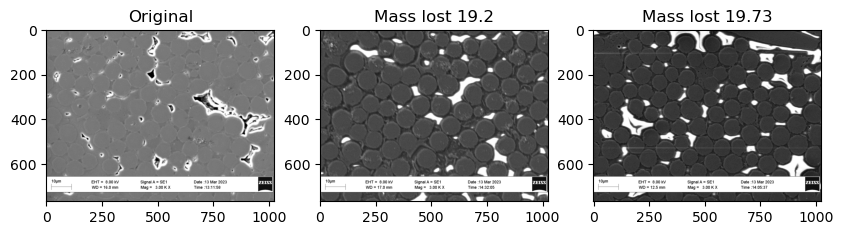

In [5]:
images_rearrange = np.array([images[2], images[0], images[1]])
titles = ["Original", "Mass lost 19.2", "Mass lost 19.73"]
plot_img(images_rearrange, titles)

In [6]:
pixel_length = 10 / 93 # 10 um in 93 pixels
pixel_area = pixel_length**2

# Print 3 decimal places
print(f"Pixel length: {pixel_length:.3f} um")
print(f"Pixel area: {pixel_area:.3f} um^2")

Pixel length: 0.108 um
Pixel area: 0.012 um^2


In [7]:
new_height = 658
new_width = images_rearrange[0].shape[1]
print(f"New height: {new_height}")
print(f"New width: {new_width}")

New height: 658
New width: 1024


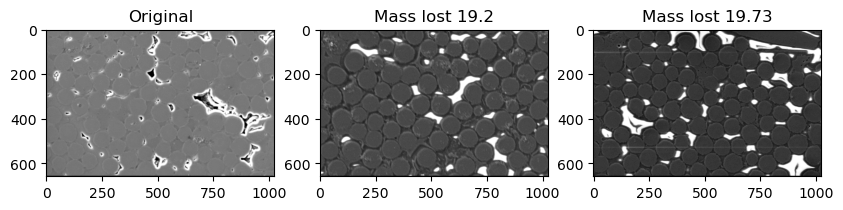

In [8]:
images_cropped = images_rearrange[:, :new_height, :new_width]
plot_img(images_cropped, titles)

In [9]:
# Save cropped images
for i, image in enumerate(images_cropped):
    cv2.imwrite(f"./images/cropped_{i}.tif", image)

In [9]:
viewer = napari.Viewer()

In [10]:
from skimage.exposure import rescale_intensity

In [11]:
or_img = images_cropped[0]

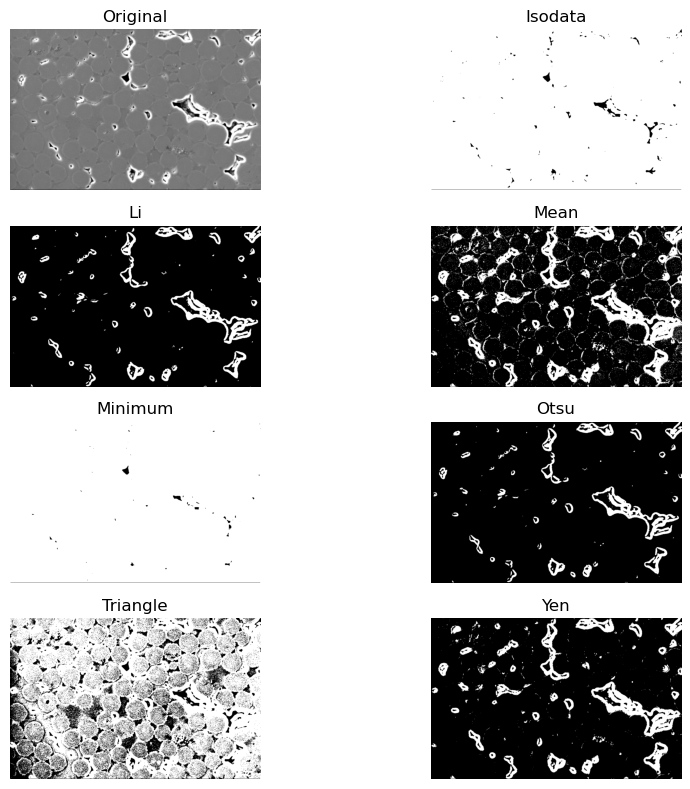

In [23]:
fig, ax = filters.try_all_threshold(or_img, figsize=(10, 8), verbose=False)
plt.show()

In [13]:
dilated_original = skimage.morphology.binary_dilation(binary_original, footprint=skimage.morphology.disk(2))
eroded_original = skimage.morphology.binary_erosion(dilated_original, footprint=skimage.morphology.disk(2))
closed_original = skimage.morphology.binary_erosion(skimage.morphology.binary_closing(dilated_original, footprint=skimage.morphology.disk(18)), footprint=skimage.morphology.disk(5))


In [14]:
# Close all layers
viewer.layers.clear()
viewer.add_image(or_img, name="original")
# viewer.add_image(binary_original, name="binary_original")
# viewer.add_image(dilated_original, name="dilated_original")
viewer.add_image(closed_original, name="closed_original", opacity=0.5)

<Image layer 'closed_original' at 0x1b79252a9a0>

In [15]:
originalHolesLabeled = skimage.measure.label(closed_original)

In [16]:
viewer.add_labels(originalHolesLabeled, name="originalHolesLabeled")

<Labels layer 'originalHolesLabeled' at 0x1b792b857f0>

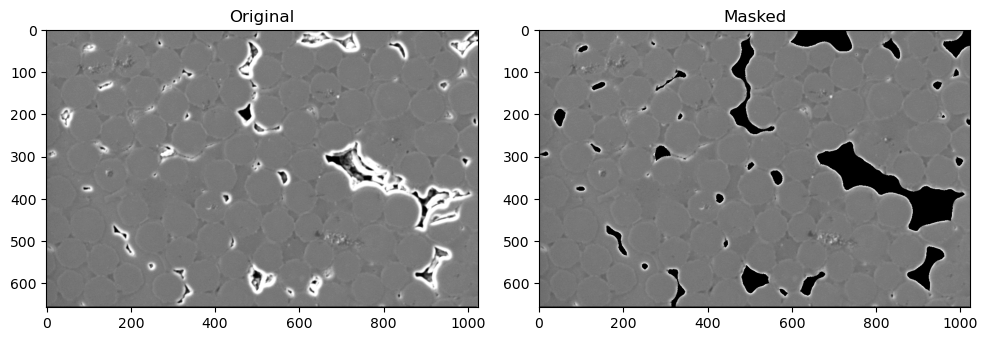

In [17]:
or_img_masked = or_img * ~closed_original
plot_one2one(or_img, or_img_masked, "Original", "Masked", cmap_name="gray")

In [18]:
fibers_matrix = or_img_masked.copy()

In [19]:
io.imsave("./images/fibers_matrix.tif", fibers_matrix)

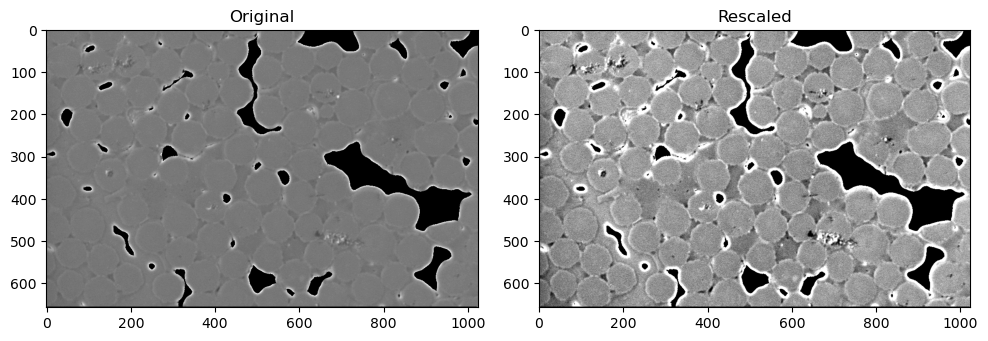

In [21]:
# Rescale intensity of or_img_masked
fibers_matrix_rescaled = rescale_intensity(fibers_matrix, in_range=(90, 140))
plot_one2one(fibers_matrix, fibers_matrix_rescaled, "Original", "Rescaled", cmap_name="gray")

In [22]:
io.imsave("./images/fibers_matrix_rescaled.tif", fibers_matrix_rescaled)

In [ ]:
# Create new label for manual labeling
viewer.add_labels(np.zeros(or_img_masked.shape), name='fibers')

In [ ]:
# Read labels from napari viewer.
# Select the labels layer and click on the labels you want to keep.

# Get the labels
labels = viewer.layers["fiberes"].count